
## Рекомендательные системы

Кожевникова Полина, вариант 11


2.1 Для заданного пользователя (совпадает с вашим номером в таблице) рассчитать оценки для всех фильмов, которые он не оценил.

In [95]:
import numpy as np
import pandas as pd
import matplotlib
import math as m

%matplotlib inline

In [96]:
data = pd.read_csv('data.csv', index_col = 0)
contextDay = pd.read_csv('context_day.csv')
contextPlace = pd.read_csv('context_place.csv')

In [97]:
data[10:11]

,Movie 1,Movie 2,Movie 3,Movie 4,Movie 5,Movie 6,Movie 7,Movie 8,Movie 9,Movie 10,...,Movie 21,Movie 22,Movie 23,Movie 24,Movie 25,Movie 26,Movie 27,Movie 28,Movie 29,Movie 30
User 11,-1,5,-1,1,5,2,4,2,4,-1,...,4,-1,3,4,1,2,4,2,5,1


In [98]:
contextDay.head(12)

,Unnamed: 0,Movie 1,Movie 2,Movie 3,Movie 4,Movie 5,Movie 6,Movie 7,Movie 8,Movie 9,...,Movie 21,Movie 22,Movie 23,Movie 24,Movie 25,Movie 26,Movie 27,Movie 28,Movie 29,Movie 30
0,User 1,-1,Thu,Tue,Mon,-1,-1,-1,Tue,Sun,...,Thu,Thu,-1,-1,Sun,Sat,-1,Wed,Wed,Thu
1,User 2,Mon,Wed,Mon,Sat,Sat,Thu,-1,Mon,Fri,...,-1,Sun,-1,Mon,Mon,Fri,-1,Sun,Tue,Wed
2,User 3,Tue,Wed,Sat,Tue,Sat,Mon,-1,Thu,Wed,...,Tue,-1,Wed,Thu,Tue,Thu,Wed,Wed,-1,Sun
3,User 4,Mon,-1,Wed,-1,-1,Sun,Sat,Mon,Mon,...,-1,Sun,Fri,Sat,Thu,Sat,Fri,Fri,Sat,Sun
4,User 5,Thu,Fri,Wed,Fri,Mon,Thu,Sat,Tue,Thu,...,Fri,Fri,Mon,-1,Wed,Mon,Sat,-1,Wed,-1
5,User 6,Mon,-1,Tue,Sat,Fri,Fri,Mon,Sun,-1,...,Thu,-1,Wed,Wed,-1,Wed,Sun,Thu,Sat,Mon
6,User 7,Thu,Tue,Sat,Fri,Sun,Sun,Fri,Wed,Mon,...,Tue,Sun,Sun,Tue,Wed,-1,Fri,Tue,Wed,Wed
7,User 8,-1,Sun,Fri,Sat,Fri,Thu,Thu,Tue,Sat,...,-1,Sat,Fri,Tue,Fri,Sun,Thu,-1,Sun,Wed
8,User 9,Sat,Sun,Thu,Thu,Tue,Wed,Mon,Tue,Sat,...,Wed,Wed,Tue,-1,Fri,Thu,Fri,Wed,Sun,Mon
9,User 10,Sun,-1,Tue,-1,Mon,Fri,Thu,Tue,Thu,...,Thu,Tue,Sun,Thu,Thu,Sun,Sat,Tue,-1,Mon


In [99]:
contextPlace.head(12)

,,Movie 1,Movie 2,Movie 3,Movie 4,Movie 5,Movie 6,Movie 7,Movie 8,Movie 9,...,Movie 21,Movie 22,Movie 23,Movie 24,Movie 25,Movie 26,Movie 27,Movie 28,Movie 29,Movie 30
0,User 1,-1,h,h,c,-1,-1,-1,v,h,...,h,c,-1,-1,c,c,-1,v,h,c
1,User 2,v,v,v,v,h,c,-1,v,h,...,-1,c,-1,c,h,v,-1,v,v,c
2,User 3,v,h,c,c,c,c,-1,h,c,...,v,-1,v,v,h,h,h,v,-1,v
3,User 4,v,-1,h,-1,-1,h,v,v,c,...,-1,v,h,h,c,v,c,v,v,c
4,User 5,c,c,c,c,v,h,v,v,c,...,v,c,v,-1,h,c,v,-1,h,-1
5,User 6,c,-1,c,h,v,c,v,v,-1,...,h,-1,c,h,-1,h,h,h,c,c
6,User 7,v,h,v,c,c,v,c,c,v,...,h,c,c,c,v,-1,v,h,h,c
7,User 8,-1,h,c,h,h,v,h,h,v,...,-1,v,c,v,h,h,c,-1,h,c
8,User 9,h,c,h,v,h,h,v,c,c,...,c,v,h,-1,v,h,v,c,h,h
9,User 10,v,-1,v,-1,v,c,h,c,h,...,c,v,h,v,c,v,v,h,-1,c


# Для заданного пользователя (совпадает с вашим номером в таблице) рассчитать оценки для всех фильмов, которые он не оценил.

In [100]:
myUser = 10
k = 4

In [101]:
data.head(11)

,Movie 1,Movie 2,Movie 3,Movie 4,Movie 5,Movie 6,Movie 7,Movie 8,Movie 9,Movie 10,...,Movie 21,Movie 22,Movie 23,Movie 24,Movie 25,Movie 26,Movie 27,Movie 28,Movie 29,Movie 30
User 1,-1,4,1,5,-1,-1,-1,1,3,-1,...,2,4,-1,-1,3,4,-1,2,4,1
User 2,4,5,2,3,3,4,-1,5,3,2,...,-1,2,-1,3,1,5,-1,5,2,2
User 3,4,2,5,4,1,5,-1,3,5,2,...,4,-1,5,4,5,1,2,1,-1,3
User 4,5,-1,2,-1,-1,2,4,3,2,3,...,-1,2,2,2,2,5,3,2,5,5
User 5,4,3,3,3,5,3,3,4,5,2,...,4,5,2,-1,3,5,1,-1,5,-1
User 6,2,-1,3,3,3,3,4,2,-1,1,...,5,-1,1,3,-1,4,4,5,1,2
User 7,4,1,4,4,1,4,5,2,2,-1,...,2,5,1,3,4,-1,4,3,1,4
User 8,-1,5,5,3,3,3,3,3,1,2,...,-1,3,1,3,2,1,4,-1,1,3
User 9,1,2,3,1,5,3,3,1,2,5,...,3,2,3,-1,1,4,3,1,5,3
User 10,5,-1,1,-1,3,3,4,1,1,2,...,4,1,4,1,4,5,2,3,-1,1


In [102]:
data = data.replace({-1:0})

In [103]:
data.head(11)

,Movie 1,Movie 2,Movie 3,Movie 4,Movie 5,Movie 6,Movie 7,Movie 8,Movie 9,Movie 10,...,Movie 21,Movie 22,Movie 23,Movie 24,Movie 25,Movie 26,Movie 27,Movie 28,Movie 29,Movie 30
User 1,0,4,1,5,0,0,0,1,3,0,...,2,4,0,0,3,4,0,2,4,1
User 2,4,5,2,3,3,4,0,5,3,2,...,0,2,0,3,1,5,0,5,2,2
User 3,4,2,5,4,1,5,0,3,5,2,...,4,0,5,4,5,1,2,1,0,3
User 4,5,0,2,0,0,2,4,3,2,3,...,0,2,2,2,2,5,3,2,5,5
User 5,4,3,3,3,5,3,3,4,5,2,...,4,5,2,0,3,5,1,0,5,0
User 6,2,0,3,3,3,3,4,2,0,1,...,5,0,1,3,0,4,4,5,1,2
User 7,4,1,4,4,1,4,5,2,2,0,...,2,5,1,3,4,0,4,3,1,4
User 8,0,5,5,3,3,3,3,3,1,2,...,0,3,1,3,2,1,4,0,1,3
User 9,1,2,3,1,5,3,3,1,2,5,...,3,2,3,0,1,4,3,1,5,3
User 10,5,0,1,0,3,3,4,1,1,2,...,4,1,4,1,4,5,2,3,0,1


In [104]:
avgRating = round(data.iloc[[myUser]].mean(axis = 1), 3)

In [105]:
print("Средняя оценка", avgRating)

Средняя оценка User 11    2.5
dtype: float64


Это никак не понадобится особо, разве что для осознания, что средняя оченка очень низкая, пользователь тот еще критик

Метрика сходств для пользователей

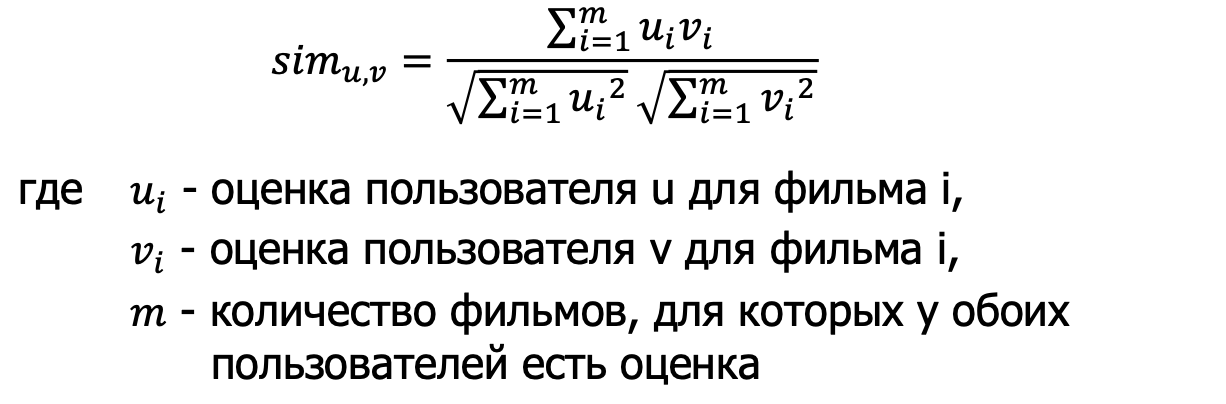

Для того, ятобы рассчитать метрику сходства нам понадобится:
пустой массив allSame; sumUV - наш числитель, сумма произведений
оценик пользователей u,v; sumU - сумма квадратов оценок
пользователя u; sumV - сумма квадратов оценок протзователья v.

In [106]:
def sim(u,v):
    sumUV, sumU, sumV = 0, 0, 0
    for i in range (len(u)):
        if u[i] > 0 and v[i] > 0:
                sumU += u[i] ** 2
                sumV += v[i] ** 2
                sumUV += v[i] * u[i]             
    return round((sumUV / (m.sqrt(sumU) * m.sqrt(sumV))), 3)

In [107]:
allSame = np.zeros((40, 40))

In [108]:
for i in range(data.shape[0]):
    userList = list(data.iloc[i]) #список оценок пользователя U
    j = i+1
    for j in range(j, data.shape[0]):
        listOfV = list(data.iloc[j])#список оценок пользователя V
        allSame[i, j] = sim(userList, listOfV)
        allSame[j, i] = allSame[i, j]

In [109]:
allSame #матрица сходств для всех пользователей

array([[0.   , 0.79 , 0.741, ..., 0.891, 0.745, 0.83 ],
       [0.79 , 0.   , 0.742, ..., 0.852, 0.766, 0.835],
       [0.741, 0.742, 0.   , ..., 0.812, 0.806, 0.729],
       ...,
       [0.891, 0.852, 0.812, ..., 0.   , 0.809, 0.886],
       [0.745, 0.766, 0.806, ..., 0.809, 0.   , 0.799],
       [0.83 , 0.835, 0.729, ..., 0.886, 0.799, 0.   ]])

In [110]:
mySame = allSame[myUser] # матрица сходств для моего пользователя

In [111]:
mySame

array([0.871, 0.803, 0.755, 0.861, 0.825, 0.902, 0.755, 0.802, 0.869,
       0.872, 0.   , 0.869, 0.796, 0.892, 0.838, 0.837, 0.835, 0.753,
       0.85 , 0.748, 0.809, 0.878, 0.738, 0.87 , 0.734, 0.905, 0.844,
       0.799, 0.834, 0.758, 0.825, 0.788, 0.902, 0.79 , 0.759, 0.804,
       0.799, 0.866, 0.829, 0.818])

In [112]:
likeMySame = mySame.argsort()[-k:]

In [113]:
print(k, "максимально похожих пользователя, их индексы:", likeMySame)

4 максимально похожих пользователя, их индексы: [13 32  5 25]


Создадим функцию для рассчета средней оценки для любого пользователя

In [114]:
def avgAllRating(v):
    sumV = 0;
    count = 0; 
    for i in range (len(v)):
        if v[i] > 0:
            count += 1
            sumV += v[i]
    return round((sumV / count),3)

Фильмы, а точнее гворя, их индексы, которые наш пользователь еще не смотрел

In [115]:
duser = data.iloc[myUser]
dontWatch = []
for index, i in enumerate(duser):
    if i == 0:
        dontWatch.append(index)
dontWatch

[0, 2, 9, 15, 16, 21]

Создадим функцию для оценки на конкретный фильм:
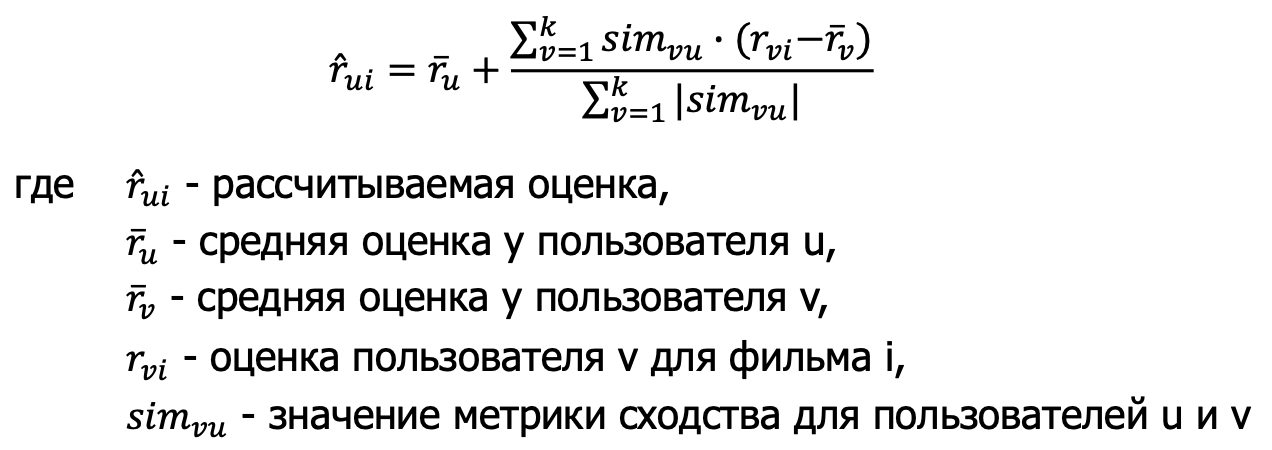

In [116]:
def r_ui(film):
    userList = list(data.iloc[myUser])
    r_u = avgAllRating(userList)
    chislit, znam = 0, 0
    for v in likeMySame:
        if(data.iloc[v,film] > 0): #если оценка пользователя v для фильма i<0
            listOfV = list(data.iloc[v]) #оценка пользователя v
            _sim = mySame[v]
            chislit += round(_sim * (data.iloc[v,film]-avgAllRating(listOfV)), 3)
            znam += abs(_sim)
    return round((r_u + chislit / znam), 3)

Теперь находим индексы фильмов, которые наш пользователь еще не посмотрел и пытаемся предсказать оценку по нашей функции

In [117]:
userList = list(data.iloc[myUser])
res1 = {}
# находим индексы непросматриваемых фильмов и пытаемся предсказать оценку
for idx, num in enumerate(userList):
        if num == 0:
            res1['movie ' + str(idx+1) + ': '] = r_ui(idx)
res1

{'movie 1: ': 2.911,
 'movie 3: ': 3.814,
 'movie 10: ': 2.658,
 'movie 16: ': 3.843,
 'movie 17: ': 1.163,
 'movie 22: ': 1.899}

# Нашему пользователю нужно порекомендовать фильм, который он посмотрит дома на выходных. 

Уже нашли, какие фильмы наш пользователь не смотрел и 4-ых ребят с похожими вкусами, узнаем, какие фильмы они смотрят дома.

In [118]:
filmAtHome = []
for user in likeMySame:
    for idx,el in enumerate(contextPlace.iloc[user]):
        if el.strip() == 'h':
            filmAtHome.append(idx+1)   
resList1 = list(set(filmAtHome))
print(resList1)

[2, 5, 6, 7, 9, 10, 13, 16, 17, 18, 19, 20, 21, 22, 23, 25, 26, 27, 28, 29, 30, 31]


Теперь узнаем, какие фильмы они смотрят на выходных.

In [119]:
filmsOnWeekend = []
for user in likeMySame:
    for idx,el in enumerate(contextDay.iloc[user]):
        if (el.strip() == 'Sun' or el.strip() == 'Sat'):
            filmsOnWeekend.append(idx+1)
resList2 = list(set(filmsOnWeekend))
print(resList2)

[2, 3, 5, 9, 11, 12, 13, 14, 15, 17, 18, 19, 22, 23, 25, 28, 29, 30, 31]


In [120]:
resList = list(set(dontWatch) & set(resList1) & set(resList2))
print("Индексы фильмов, которые не смотрел наш пользователь, но которые смотрели пользовати с похожим вкусом дома на выходных:", resList)

Индексы фильмов, которые не смотрел наш пользователь, но которые смотрели пользовати с похожим вкусом дома на выходных: [9, 2]


In [121]:
count = 0
filmRating = {}
t = 0

for i in resList:
    for j in likeMySame:
        raiting = data.iloc[j][i]
        if raiting > 0:
            t += 1
            count+= raiting
    filmRating[i] = round(count / t, 3)

filmRating

{9: 2.5, 2: 3.0}

In [122]:
#нашла максимальное значение среди всех фильмов
max_val = max(filmRating.values())
dictRes2 = {}
recom_film = {f'movie {k+1}: ':v for k, v in filmRating.items() if v == max_val}
print(recom_film)
#Ставим предположительную оценку из тех, что я предстказала ранее
for key1, value1 in res1.items():
    for key2, value2 in recom_film.items():
        if key2 == key1:
            recom_film[key2] = value1
print(recom_film)

{'movie 3: ': 3.0}
{'movie 3: ': 3.814}


In [123]:
import json
result = {"user": 11, "Task 1": res1, "Task 2": recom_film}
with open('result.json', 'w', encoding='utf-8') as f:
    json.dump(result, f, ensure_ascii=False, indent=4)

In [124]:
names = pd.read_csv('movie_names.csv', index_col=0, names=['Movie', 'Name'])
names

,Name
Movie,
Movie 1,The Shawshank Redemption
Movie 2,The Godfather
Movie 3,The Godfather: Part II
Movie 4,The Dark Knight
Movie 5,12 Angry Men
Movie 6,Schindler's List
Movie 7,The Lord of the Rings: The Return of the King
Movie 8,Pulp Fiction
Movie 9,The Good the Bad and the Ugly


In [125]:
from SPARQLWrapper import SPARQLWrapper, JSON
import pandas as pd
import requests

In [126]:
API_ENDPOINT = "https://www.wikidata.org/w/api.php"

In [127]:
movieName = "The Godfather Part II "

In [128]:
params = {
    'action' : 'wbsearchentities',
    'format' : 'json',
    'language' : 'en',
    'search': movieName
}
res = requests.get(API_ENDPOINT, params = params)
res.json()['search'][0]['description']
res.json()

{'searchinfo': {'search': 'The Godfather Part II '},
 'search': [{'id': 'Q184768',
   'title': 'Q184768',
   'pageid': 183705,
   'repository': 'wikidata',
   'url': '//www.wikidata.org/wiki/Q184768',
   'concepturi': 'http://www.wikidata.org/entity/Q184768',
   'label': 'The Godfather Part II',
   'description': '1974 film directed by Francis Ford Coppola',
   'match': {'type': 'label',
    'language': 'en',
    'text': 'The Godfather Part II'}},
  {'id': 'Q3794989',
   'title': 'Q3794989',
   'pageid': 3618892,
   'repository': 'wikidata',
   'url': '//www.wikidata.org/wiki/Q3794989',
   'concepturi': 'http://www.wikidata.org/entity/Q3794989',
   'label': 'The Godfather Part II',
   'description': 'soundtrack to the 1974 crime drama film',
   'match': {'type': 'label',
    'language': 'en',
    'text': 'The Godfather Part II'}},
  {'id': 'Q202326',
   'title': 'Q202326',
   'pageid': 198910,
   'repository': 'wikidata',
   'url': '//www.wikidata.org/wiki/Q202326',
   'concepturi': 'h

In [129]:
filmcode=res.json()['search'][0]['id']

In [130]:
sparql = SPARQLWrapper("https://query.wikidata.org/sparql")

sparql_query = """

#11:  список фильмов сценариста рекомендованного фильма
SELECT ?films ?filmsLabel WHERE {
  wd:Q184768 wdt:P58 ?screenwriter .
  ?films wdt:P31 wd:Q11424;
    wdt:P58 ?screenwriter .
  FILTER(?films != wd:Q184768)
  SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],ru". }
}
"""

sparql.setQuery(sparql_query)

sparql.setReturnFormat(JSON)
results = sparql.query().convert()


In [131]:
results_df = pd.json_normalize(results['results']['bindings'])
results_df[['films.value', 'filmsLabel.value']].head(11)

,films.value,filmsLabel.value
0,http://www.wikidata.org/entity/Q47703,Крёстный отец
1,http://www.wikidata.org/entity/Q47703,Крёстный отец
2,http://www.wikidata.org/entity/Q182692,Апокалипсис сегодня
3,http://www.wikidata.org/entity/Q202326,Крёстный отец 3
4,http://www.wikidata.org/entity/Q202326,Крёстный отец 3
5,http://www.wikidata.org/entity/Q213053,Супермен
6,http://www.wikidata.org/entity/Q217220,Паттон
7,http://www.wikidata.org/entity/Q267672,Супермен 2
8,http://www.wikidata.org/entity/Q500280,Землетрясение
9,http://www.wikidata.org/entity/Q553194,Молодость без молодости
